Ce Devoir a été fait par Karim Rekik && Yaser Hadjersi

In [329]:
# We import necesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D


In [330]:
df = pd.read_excel('Folds5x2_pp.xlsx')

 **Dans cette partie on va etudier le Dataset et l'analyser**

In [331]:
df.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [333]:
print("Shape:", df.shape)
print( df.describe())

Shape: (9568, 5)
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


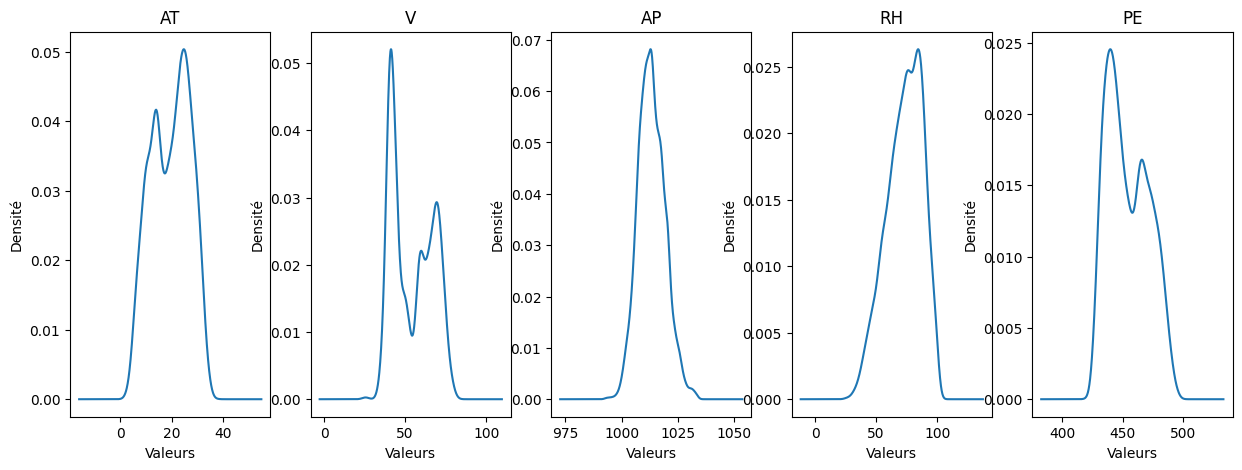

In [334]:
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))

# show each column's distribution
for i, column in enumerate(df.columns):
    df[column].plot.kde(ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Valeurs')
    axes[i].set_ylabel('Densité')

#plt.tight_layout()

plt.show()

In [335]:
# Print the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


**La correlation nous a montré que la colonne AT aura le plus grand impact sur PE alors que RH aura le plus bas**

In [336]:
# Normalize the df
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_normalized.describe())


                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean      0.505417     0.515050     0.504060     0.640067     0.451722
std       0.211118     0.226119     0.146963     0.195714     0.226053
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.331445     0.291459     0.401138     0.506267     0.258146
50%       0.525071     0.475445     0.496164     0.662399     0.414437
75%       0.677337     0.732740     0.603069     0.794504     0.638013
max       1.000000     1.000000     1.000000     1.000000     1.000000


In [337]:
#Split the features and the target
X = df_normalized.to_numpy()[:, :-1]
Y = df_normalized.to_numpy()[:, -1]

**Dans la partie suivante on va prendre comme features les colonnes AT et V et leur produit**

In [338]:
# A Numpy matrix that has the feature 0 (AT) and  feature 1 (V) and their product
X_AT_V = np.column_stack((X[:, 0], X[:, 1], X[:, 0] * X[:, 1]))
X_AT_V

array([[0.37252125, 0.29181495, 0.10870727],
       [0.66203966, 0.66903915, 0.44293045],
       [0.09348442, 0.24982206, 0.02335447],
       ...,
       [0.83597734, 0.87135231, 0.72843079],
       [0.64220963, 0.78451957, 0.50382603],
       [0.56062323, 0.66120996, 0.37068967]])

In [339]:
X_train, X_test, Y_train, Y_test = train_test_split(X_AT_V, Y, test_size=0.3, random_state=42, shuffle = True)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (6697, 3)
Shape of X_test: (2871, 3)
Shape of Y_train: (6697,)
Shape of Y_test: (2871,)


On entrainera notre modéle en utilisant un modele linéaire de regression




In [340]:
# train it and test it now with linear regression

model = LinearRegression()
model.fit(X_train, Y_train)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
#la valeur de l'erreur moyenne: rmse
rmse = math.sqrt(mse)
print("Mean squared error:", mse)
print("R-squared score:", r2)
print("Mean error:",rmse)

Model coefficients: [-1.0708487  -0.61281389  0.63090982]
Model intercept: 1.1188143479513588
Mean squared error: 0.003908714756263031
R-squared score: 0.9239982316222817
Mean error: 0.06251971494067317


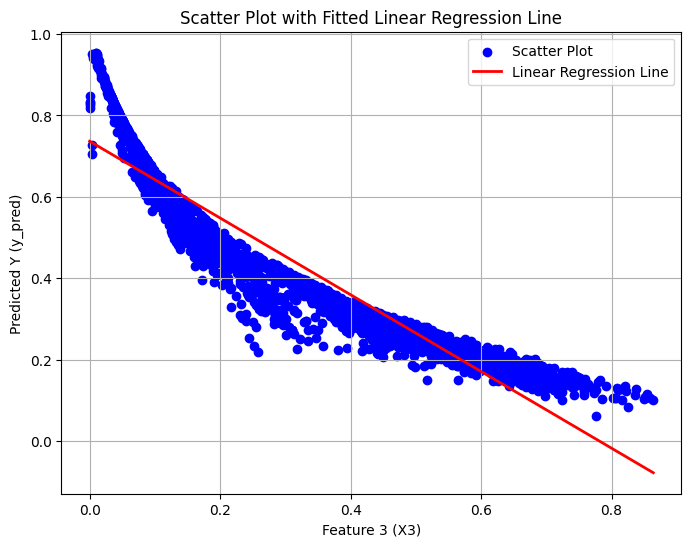

In [341]:
X3 = X_test[:, 2]

# Sort X3
sorted_indices = np.argsort(X3)
X3_sorted = X3[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Create a scatter plot with X3 and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X3, y_pred, c='blue', marker='o', label='Scatter Plot')


# Fit a simple linear regression line
coefficients = np.polyfit(X3, y_pred, 1)
regression_line = np.polyval(coefficients, X3_sorted)

# Add the regression line in red
plt.plot(X3_sorted, regression_line, color='red', linewidth=2, label='Linear Regression Line')

# Set labels and title
plt.xlabel('Feature 3 (X3)')
plt.ylabel('Predicted Y (y_pred)')
plt.title('Scatter Plot with Fitted Linear Regression Line')

# Show the legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()


On entrainera notre modéle en utilisant un modele polynomial de degré 2 de regression




In [342]:
# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model.fit(X_train_poly, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model on the test set
mean_error = mean_squared_error(Y_test, y_pred, squared=False)
print("Mean Error (RMSE):", mean_error)

r2 = r2_score(Y_test, y_pred)
print("R-squared score:", r2)

Mean Error (RMSE): 0.06071956068918555
R-squared score: 0.9283119180945899


Le deuxieme modele nous a donné des resultats legerement plus performant

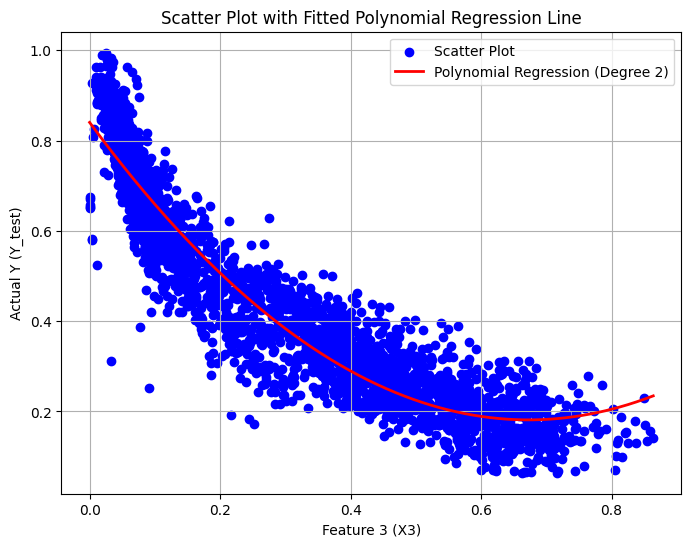

In [343]:
# Sort X3 for a smoother line
sorted_indices = np.argsort(X_test[:, 2])
X3_sorted = X_test[:, 2][sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial regression line
coefficients = np.polyfit(X3_sorted, y_pred_sorted, 2)
poly_regression_line = np.polyval(coefficients, X3_sorted)

# Set up the scatter plot with X3 and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 2], Y_test, c='blue', marker='o', label='Scatter Plot')

# Add the polynomial regression line in green
plt.plot(X3_sorted, poly_regression_line, color='red', linewidth=2, label=f'Polynomial Regression (Degree {2})')

# Set labels for the axes
plt.xlabel('Feature 3 (X3)')
plt.ylabel('Actual Y (Y_test)')
plt.title('Scatter Plot with Fitted Polynomial Regression Line')

# Show the legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()

In [344]:
predicted_y = pd.DataFrame({'Actual value':Y_test,"Predicted value" : y_pred , "Difference" : Y_test - y_pred})
predicted_y


,Actual value,Predicted value,Difference
0,0.463709,0.459530,0.004179
1,0.212583,0.202861,0.009721
2,0.270464,0.215251,0.055213
3,0.187285,0.198616,-0.011331
4,0.818543,0.770857,0.047686
...,...,...,...
2866,0.433907,0.497974,-0.064067
2867,0.172318,0.227089,-0.054771
2868,0.753907,0.669349,0.084558
2869,0.817086,0.749844,0.067242


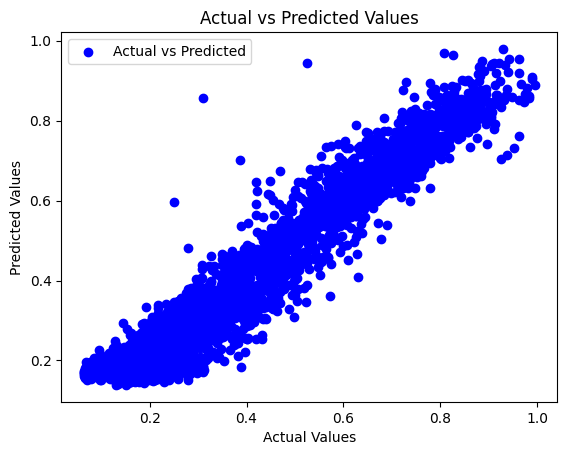

In [345]:

# Visualize the results
plt.scatter(Y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


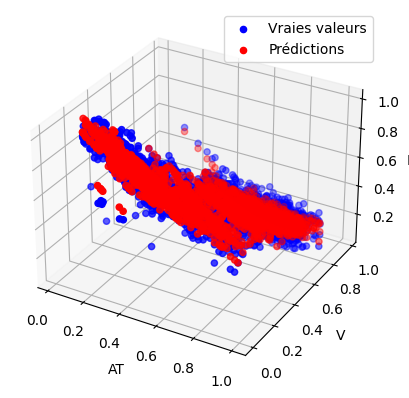

In [346]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], Y_test, c='blue', label='Vraies valeurs')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='red', label='Prédictions')

ax.set_xlabel('AT')
ax.set_ylabel('V')
ax.set_zlabel('PE')

ax.legend()

plt.show()

**Dans la partie suivante on va prendre comme features les colonnes AT et AP
 et leur produit**

In [347]:
# A Numpy matrix that has the feature 0 (AT) and  feature 2 (AP) and their product
X_AT_AP = np.column_stack((X[:, 0], X[:, 2], X[:, 0] * X[:, 2]))
X_AT_AP


array([[0.37252125, 0.77159119, 0.28743411],
       [0.66203966, 0.6718634 , 0.44480022],
       [0.09348442, 0.47686216, 0.04457918],
       ...,
       [0.83597734, 0.49566939, 0.41436838],
       [0.64220963, 0.51893096, 0.33326246],
       [0.56062323, 0.60232616, 0.33767804]])

In [348]:
X_train, X_test, Y_train, Y_test = train_test_split(X_AT_AP, Y, test_size=0.3, random_state=42, shuffle = True)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (6697, 3)
Shape of X_test: (2871, 3)
Shape of Y_train: (6697,)
Shape of Y_test: (2871,)


1er modele en regression linéaire

In [349]:
# train it and test it now with linear regression
model = LinearRegression()
model.fit(X_train, Y_train)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
#la valeur de l'erreur moyenne: rmse
rmse = math.sqrt(mse)
print("Mean squared error:", mse)
print("R-squared score:", r2)
print("Mean error:",rmse)


Model coefficients: [-0.98717734  0.07486916 -0.01596197]
Model intercept: 0.9165843859366014
Mean squared error: 0.005134046780646511
R-squared score: 0.9001726504504213
Mean error: 0.07165226291364782


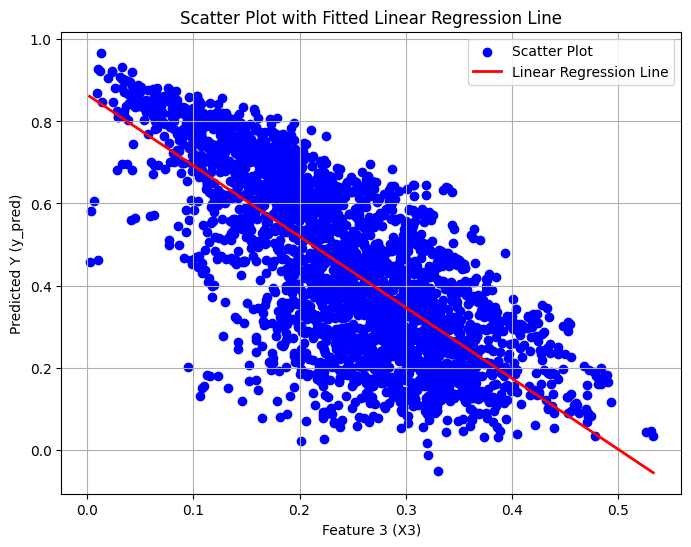

In [350]:
X3 = X_test[:, 2]

# Sort X3
sorted_indices = np.argsort(X3)
X3_sorted = X3[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Create a scatter plot with X3 and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X3, y_pred, c='blue', marker='o', label='Scatter Plot')


# Fit a simple linear regression line
coefficients = np.polyfit(X3, y_pred, 1)
regression_line = np.polyval(coefficients, X3_sorted)

# Add the regression line in red
plt.plot(X3_sorted, regression_line, color='red', linewidth=2, label='Linear Regression Line')

# Set labels and title
plt.xlabel('Feature 3 (X3)')
plt.ylabel('Predicted Y (y_pred)')
plt.title('Scatter Plot with Fitted Linear Regression Line')

# Show the legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()


2eme modele


Mean Error (RMSE): 0.06752578235719234
R-squared score: 0.9113397465813566


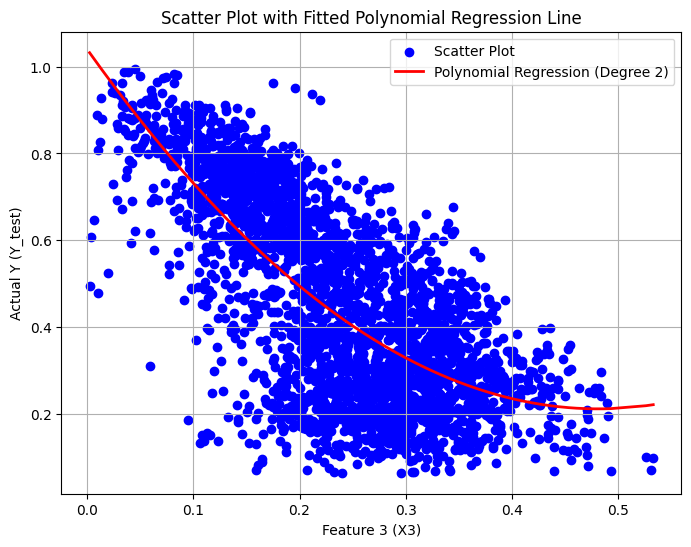

In [351]:
# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model.fit(X_train_poly, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model on the test set
mean_error = mean_squared_error(Y_test, y_pred, squared=False)
print("Mean Error (RMSE):", mean_error)

r2 = r2_score(Y_test, y_pred)
print("R-squared score:", r2)
# Sort X3 for a smoother line
sorted_indices = np.argsort(X_test[:, 2])
X3_sorted = X_test[:, 2][sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial regression line
coefficients = np.polyfit(X3_sorted, y_pred_sorted, 2)
poly_regression_line = np.polyval(coefficients, X3_sorted)

# Set up the scatter plot with X3 and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 2], Y_test, c='blue', marker='o', label='Scatter Plot')

# Add the polynomial regression line in green
plt.plot(X3_sorted, poly_regression_line, color='red', linewidth=2, label=f'Polynomial Regression (Degree {2})')

# Set labels for the axes
plt.xlabel('Feature 3 (X3)')
plt.ylabel('Actual Y (Y_test)')
plt.title('Scatter Plot with Fitted Polynomial Regression Line')

# Show the legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()

Pour ces features, les reultats obtenu par le premier modele sont mieux que celles obtenues dans le 2eme modele

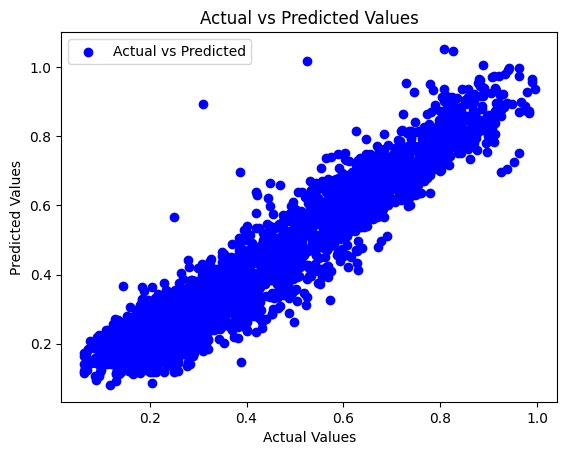

In [352]:
# Visualize the results
plt.scatter(Y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


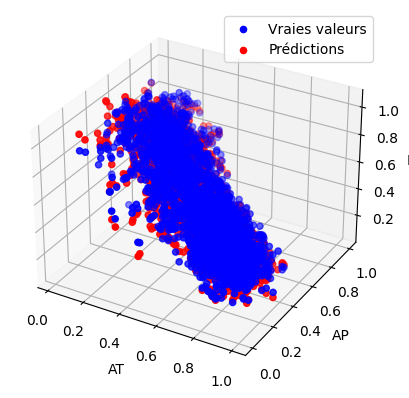

In [353]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], Y_test, c='blue', label='Vraies valeurs')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='red', label='Prédictions')

ax.set_xlabel('AT')
ax.set_ylabel('AP')
ax.set_zlabel('PE')

ax.legend()

plt.show()

On prendra comme features le AT et RH ainsi que leurs produit

In [354]:
# A Numpy matrix that has the feature 0 (AT) and  feature 3 (RH) and their product
X_AT_RH = np.column_stack((X[:, 0], X[:, 3], X[:, 0] * X[:, 3]))

X_AT_RH


array([[0.37252125, 0.63820375, 0.23774446],
       [0.66203966, 0.44932976, 0.29747412],
       [0.09348442, 0.8924933 , 0.08343422],
       ...,
       [0.83597734, 0.1463807 , 0.12237095],
       [0.64220963, 0.49369973, 0.31705872],
       [0.56062323, 0.56715818, 0.31796205]])

In [355]:
X_train, X_test, Y_train, Y_test = train_test_split(X_AT_RH, Y, test_size=0.3, random_state=42, shuffle = True)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (6697, 3)
Shape of X_test: (2871, 3)
Shape of Y_train: (6697,)
Shape of Y_test: (2871,)


1er modele

In [356]:
# train it and test it now with linear regression
model = LinearRegression()
model.fit(X_train, Y_train)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
#la valeur de l'erreur moyenne: rmse
rmse = math.sqrt(mse)
print("Mean squared error:", mse)
print("R-squared score:", r2)
print("Mean error:",rmse)

Model coefficients: [-0.89926293 -0.01211938 -0.34427723]
Model intercept: 1.0174400020588608
Mean squared error: 0.0039877623313224735
R-squared score: 0.9224612160391258
Mean error: 0.06314873182671583


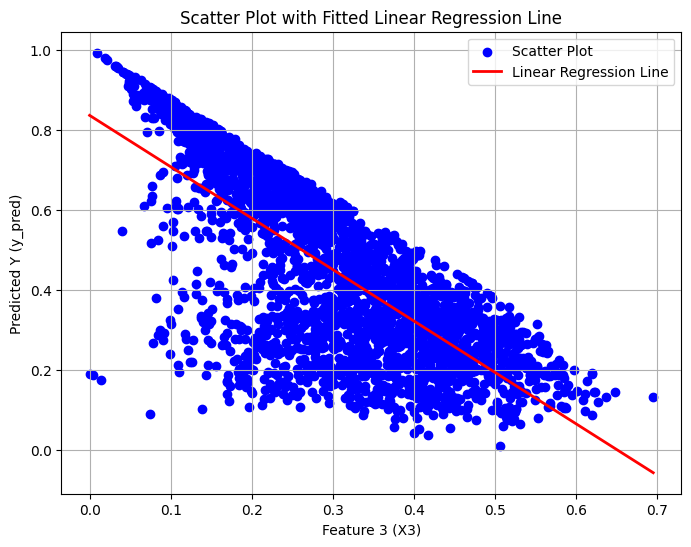

In [357]:
X3 = X_test[:, 2]

# Sort X3
sorted_indices = np.argsort(X3)
X3_sorted = X3[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Create a scatter plot with X3 and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X3, y_pred, c='blue', marker='o', label='Scatter Plot')


# Fit a simple linear regression line
coefficients = np.polyfit(X3, y_pred, 1)
regression_line = np.polyval(coefficients, X3_sorted)

# Add the regression line in red
plt.plot(X3_sorted, regression_line, color='red', linewidth=2, label='Linear Regression Line')

# Set labels and title
plt.xlabel('Feature 3 (X3)')
plt.ylabel('Predicted Y (y_pred)')
plt.title('Scatter Plot with Fitted Linear Regression Line')

# Show the legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()


2eme modele

Mean Error (RMSE): 0.06206915107601203
R-squared score: 0.9250897355686637


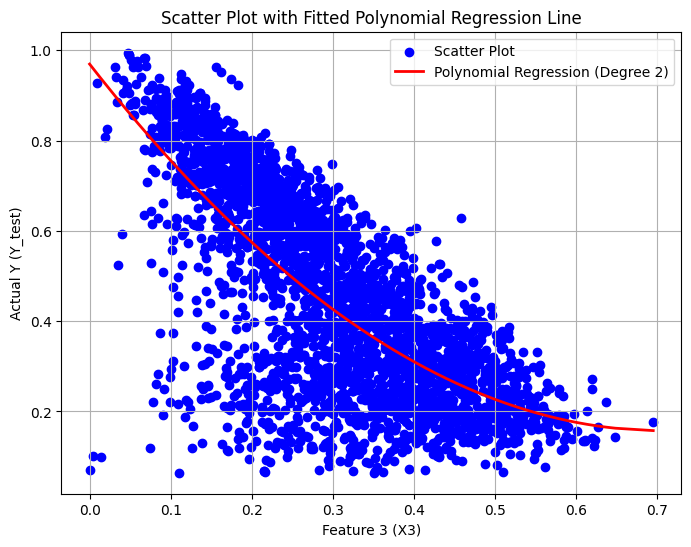

In [358]:

# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model.fit(X_train_poly, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model on the test set
mean_error = mean_squared_error(Y_test, y_pred, squared=False)
print("Mean Error (RMSE):", mean_error)

r2 = r2_score(Y_test, y_pred)
print("R-squared score:", r2)
# Sort X3 for a smoother line
sorted_indices = np.argsort(X_test[:, 2])
X3_sorted = X_test[:, 2][sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial regression line
coefficients = np.polyfit(X3_sorted, y_pred_sorted, 2)
poly_regression_line = np.polyval(coefficients, X3_sorted)

# Set up the scatter plot with X3 and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 2], Y_test, c='blue', marker='o', label='Scatter Plot')

# Add the polynomial regression line in green
plt.plot(X3_sorted, poly_regression_line, color='red', linewidth=2, label=f'Polynomial Regression (Degree {2})')

# Set labels for the axes
plt.xlabel('Feature 3 (X3)')
plt.ylabel('Actual Y (Y_test)')
plt.title('Scatter Plot with Fitted Polynomial Regression Line')

# Show the legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()


Dans ce cas on a les resultats du 2eme modele qui sont legerement mieux que ceux du 1er modele

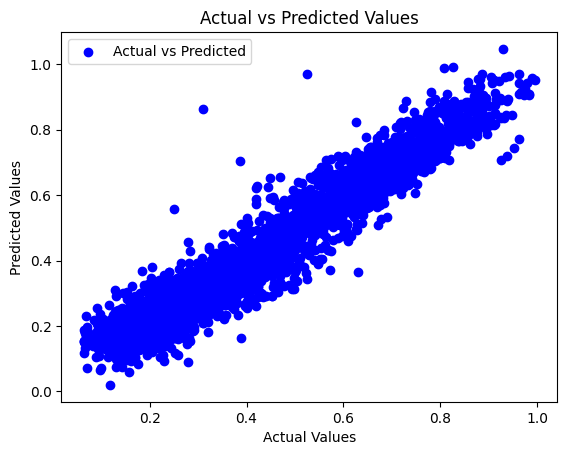

In [359]:
# Visualize the results
plt.scatter(Y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


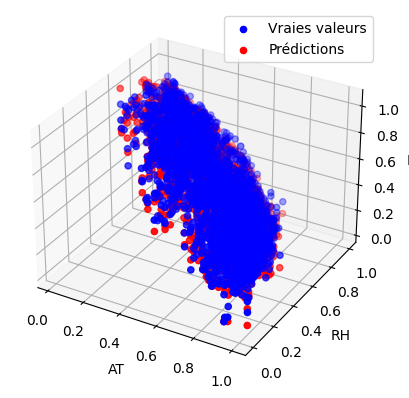

In [360]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], Y_test, c='blue', label='Vraies valeurs')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='red', label='Prédictions')

ax.set_xlabel('AT')
ax.set_ylabel('RH')
ax.set_zlabel('PE')

ax.legend()

plt.show()

On a comme features V et AP

In [361]:
# A Numpy matrix that has the feature 1 (V) and  feature 2 (AP) and their product
X_V_AP = np.column_stack((X[:, 1], X[:, 2], X[:, 1] * X[:, 2]))

print("X_V_AP", X_V_AP)
X_train, X_test, Y_train, Y_test = train_test_split(X_V_AP, Y, test_size=0.3, random_state=42, shuffle = True)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

X_V_AP [[0.29181495 0.77159119 0.22516184]
 [0.66903915 0.6718634  0.44950292]
 [0.24982206 0.47686216 0.11913069]
 ...
 [0.87135231 0.49566939 0.43190267]
 [0.78451957 0.51893096 0.40711149]
 [0.66120996 0.60232616 0.39826406]]
Shape of X_train: (6697, 3)
Shape of X_test: (2871, 3)
Shape of Y_train: (6697,)
Shape of Y_test: (2871,)


1er modele avec les resultats

In [362]:
# train it and test it now with linear regression
model = LinearRegression()
model.fit(X_train, Y_train)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
#la valeur de l'erreur moyenne: rmse
rmse = math.sqrt(mse)
print("Mean squared error:", mse)
print("R-squared score:", r2)
print("Mean error:",rmse)

Model coefficients: [-0.64818412  0.42333557 -0.30845751]
Model intercept: 0.6478213393165062
Mean squared error: 0.010314159654809675
R-squared score: 0.7994495833087851
Mean error: 0.10155865130460169


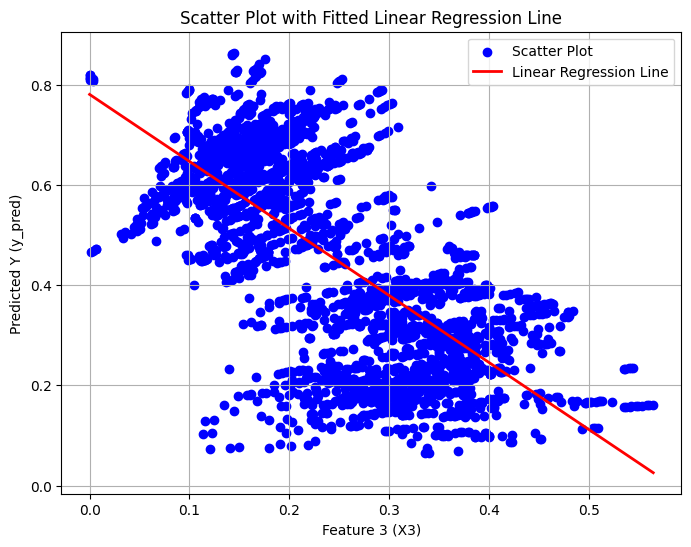

In [363]:
X3 = X_test[:, 2]

# Sort X3
sorted_indices = np.argsort(X3)
X3_sorted = X3[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Create a scatter plot with X3 and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X3, y_pred, c='blue', marker='o', label='Scatter Plot')


# Fit a simple linear regression line
coefficients = np.polyfit(X3, y_pred, 1)
regression_line = np.polyval(coefficients, X3_sorted)

# Add the regression line in red
plt.plot(X3_sorted, regression_line, color='red', linewidth=2, label='Linear Regression Line')

# Set labels and title
plt.xlabel('Feature 3 (X3)')
plt.ylabel('Predicted Y (y_pred)')
plt.title('Scatter Plot with Fitted Linear Regression Line')

# Show the legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()


2eme modele

Mean Error (RMSE): 0.09743002214612134
R-squared score: 0.8154239611031887


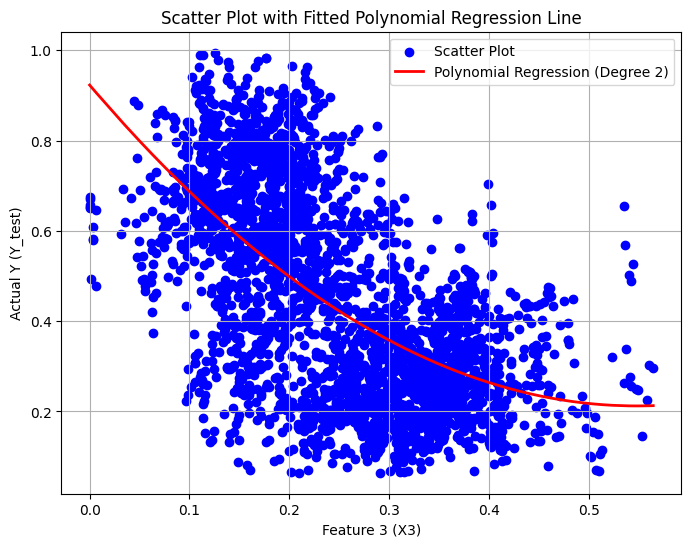

In [364]:

# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model.fit(X_train_poly, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model on the test set
mean_error = mean_squared_error(Y_test, y_pred, squared=False)
print("Mean Error (RMSE):", mean_error)

r2 = r2_score(Y_test, y_pred)
print("R-squared score:", r2)
# Sort X3 for a smoother line
sorted_indices = np.argsort(X_test[:, 2])
X3_sorted = X_test[:, 2][sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial regression line
coefficients = np.polyfit(X3_sorted, y_pred_sorted, 2)
poly_regression_line = np.polyval(coefficients, X3_sorted)

# Set up the scatter plot with X3 and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 2], Y_test, c='blue', marker='o', label='Scatter Plot')

# Add the polynomial regression line in green
plt.plot(X3_sorted, poly_regression_line, color='red', linewidth=2, label=f'Polynomial Regression (Degree {2})')

# Set labels for the axes
plt.xlabel('Feature 3 (X3)')
plt.ylabel('Actual Y (Y_test)')
plt.title('Scatter Plot with Fitted Polynomial Regression Line')

# Show the legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()


On peut constater que le 2eme modele est mieux que le 1er

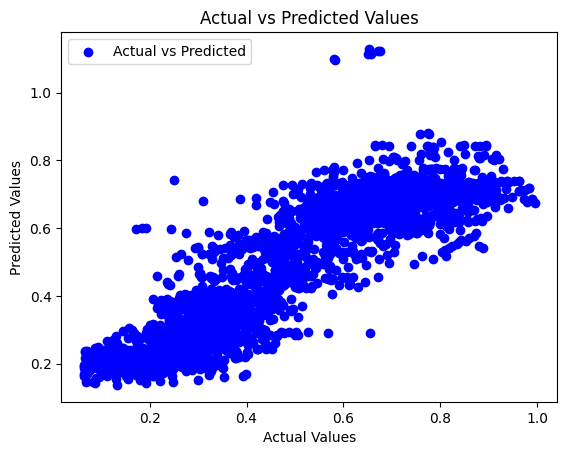

In [365]:
# Visualize the results
plt.scatter(Y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


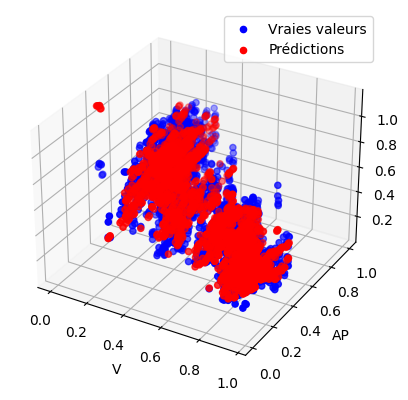

In [366]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], Y_test, c='blue', label='Vraies valeurs')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='red', label='Prédictions')

ax.set_xlabel('V')
ax.set_ylabel('AP')
ax.set_zlabel('PE')

ax.legend()

plt.show()

On a comme features V et RH et leur produit

In [367]:
# A Numpy matrix that has the feature 1 (V) and  feature 3 (RH) and their product
X_V_RH = np.column_stack((X[:, 1], X[:, 3], X[:, 1] * X[:, 3]))

X_V_RH


array([[0.29181495, 0.63820375, 0.18623739],
       [0.66903915, 0.44932976, 0.3006192 ],
       [0.24982206, 0.8924933 , 0.22296452],
       ...,
       [0.87135231, 0.1463807 , 0.12754916],
       [0.78451957, 0.49369973, 0.3873171 ],
       [0.66120996, 0.56715818, 0.37501064]])

In [368]:
X_train, X_test, Y_train, Y_test = train_test_split(X_V_RH, Y, test_size=0.3, random_state=42, shuffle = True)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (6697, 3)
Shape of X_test: (2871, 3)
Shape of Y_train: (6697,)
Shape of Y_test: (2871,)


1er modele

In [369]:
# train it and test it now with linear regression
model = LinearRegression()
model.fit(X_train, Y_train)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
#la valeur de l'erreur moyenne: rmse
rmse = math.sqrt(mse)
print("Mean squared error:", mse)
print("R-squared score:", r2)
print("Mean error:",rmse)

Model coefficients: [-0.58585862  0.35893316 -0.37164961]
Model intercept: 0.6406463218790692
Mean squared error: 0.011347725467457694
R-squared score: 0.7793527396160762
Mean error: 0.10652570331829635


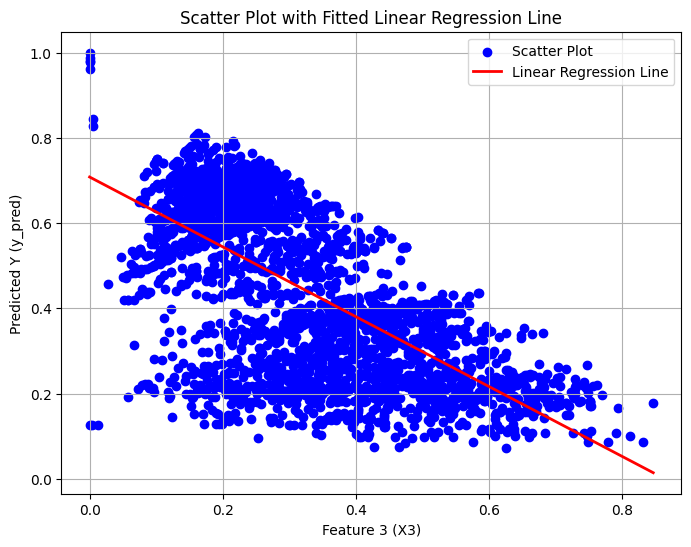

In [370]:
X3 = X_test[:, 2]

# Sort X3
sorted_indices = np.argsort(X3)
X3_sorted = X3[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Create a scatter plot with X3 and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X3, y_pred, c='blue', marker='o', label='Scatter Plot')


# Fit a simple linear regression line
coefficients = np.polyfit(X3, y_pred, 1)
regression_line = np.polyval(coefficients, X3_sorted)

# Add the regression line in red
plt.plot(X3_sorted, regression_line, color='red', linewidth=2, label='Linear Regression Line')

# Set labels and title
plt.xlabel('Feature 3 (X3)')
plt.ylabel('Predicted Y (y_pred)')
plt.title('Scatter Plot with Fitted Linear Regression Line')

# Show the legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()


2eme modele

Mean Error (RMSE): 0.10380898485211164
R-squared score: 0.7904635377130347


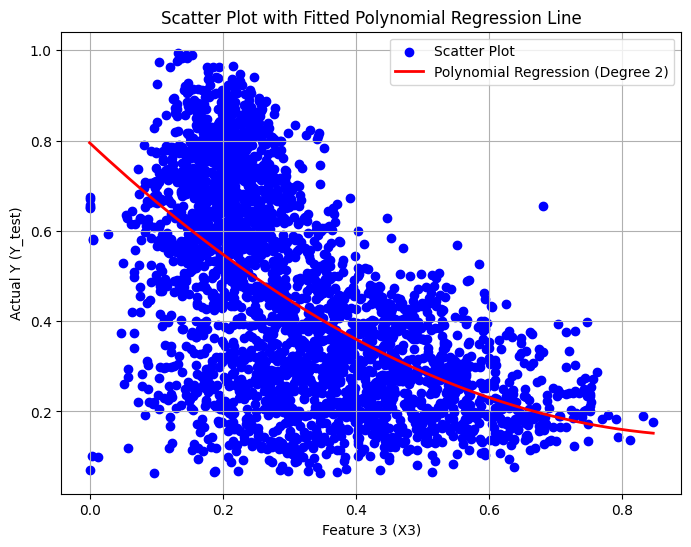

In [371]:

# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model.fit(X_train_poly, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model on the test set
mean_error = mean_squared_error(Y_test, y_pred, squared=False)
print("Mean Error (RMSE):", mean_error)

r2 = r2_score(Y_test, y_pred)
print("R-squared score:", r2)
# Sort X3 for a smoother line
sorted_indices = np.argsort(X_test[:, 2])
X3_sorted = X_test[:, 2][sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial regression line
coefficients = np.polyfit(X3_sorted, y_pred_sorted, 2)
poly_regression_line = np.polyval(coefficients, X3_sorted)

# Set up the scatter plot with X3 and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 2], Y_test, c='blue', marker='o', label='Scatter Plot')

# Add the polynomial regression line in green
plt.plot(X3_sorted, poly_regression_line, color='red', linewidth=2, label=f'Polynomial Regression (Degree {2})')

# Set labels for the axes
plt.xlabel('Feature 3 (X3)')
plt.ylabel('Actual Y (Y_test)')
plt.title('Scatter Plot with Fitted Polynomial Regression Line')

# Show the legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()


Pour ce cas aussi le deuxieme modele etait plus performant que le premier

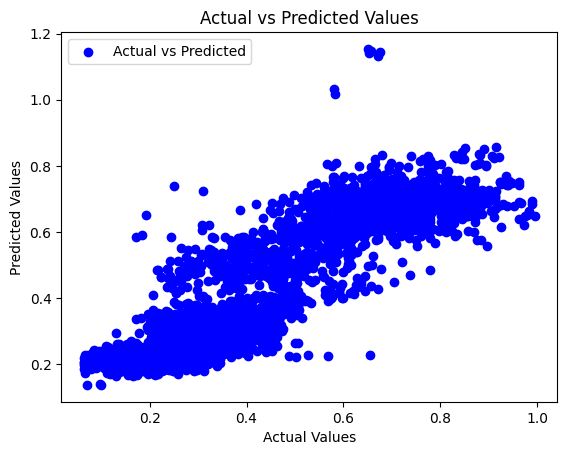

In [372]:
# Visualize the results
plt.scatter(Y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


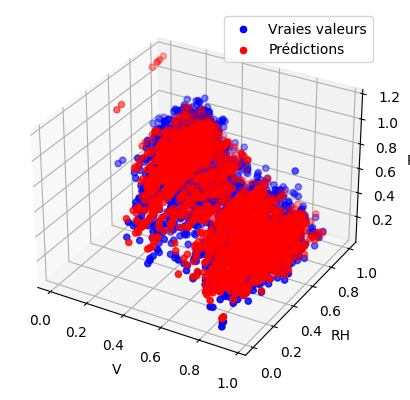

In [373]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], Y_test, c='blue', label='Vraies valeurs')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='red', label='Prédictions')

ax.set_xlabel('V')
ax.set_ylabel('RH')
ax.set_zlabel('PE')

ax.legend()

plt.show()

On a pris comme features AP et RH

In [374]:
# A Numpy matrix that has the feature 2 (AP) and  feature 3 (RH) and their product
X_AP_RH = np.column_stack((X[:, 2], X[:, 3], X[:, 2] * X[:, 3]))
X_train, X_test, Y_train, Y_test = train_test_split(X_AP_RH, Y, test_size=0.3, random_state=42, shuffle = True)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (6697, 3)
Shape of X_test: (2871, 3)
Shape of Y_train: (6697,)
Shape of Y_test: (2871,)


1er Modele

In [375]:
# train it and test it now with linear regression
model = LinearRegression()
model.fit(X_train, Y_train)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
#la valeur de l'erreur moyenne: rmse
rmse = math.sqrt(mse)
print("Mean squared error:", mse)
print("R-squared score:", r2)
print("Mean error:",rmse)

Model coefficients: [ 0.82910697  0.46401813 -0.15220607]
Model intercept: -0.21278020686599952
Mean squared error: 0.03047662065228197
R-squared score: 0.4074069846005286
Mean error: 0.1745755442560096


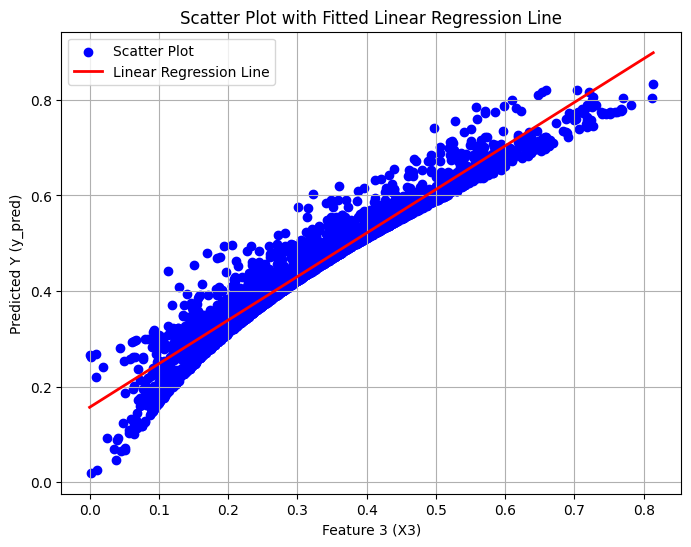

In [376]:
X3 = X_test[:, 2]

# Sort X3
sorted_indices = np.argsort(X3)
X3_sorted = X3[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Create a scatter plot with X3 and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X3, y_pred, c='blue', marker='o', label='Scatter Plot')


# Fit a simple linear regression line
coefficients = np.polyfit(X3, y_pred, 1)
regression_line = np.polyval(coefficients, X3_sorted)

# Add the regression line in red
plt.plot(X3_sorted, regression_line, color='red', linewidth=2, label='Linear Regression Line')

# Set labels and title
plt.xlabel('Feature 3 (X3)')
plt.ylabel('Predicted Y (y_pred)')
plt.title('Scatter Plot with Fitted Linear Regression Line')

# Show the legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()


2eme modele

Mean Error (RMSE): 0.17229467742885946
R-squared score: 0.42279053808478695


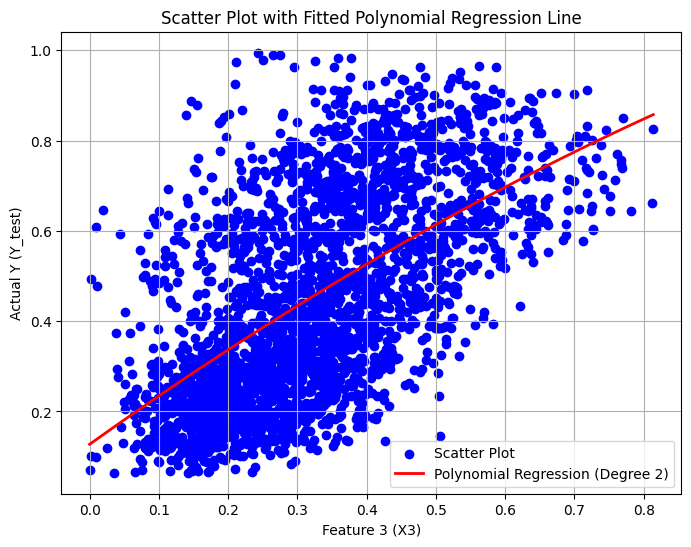

In [377]:

# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model.fit(X_train_poly, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model on the test set
mean_error = mean_squared_error(Y_test, y_pred, squared=False)
print("Mean Error (RMSE):", mean_error)

r2 = r2_score(Y_test, y_pred)
print("R-squared score:", r2)
# Sort X3 for a smoother line
sorted_indices = np.argsort(X_test[:, 2])
X3_sorted = X_test[:, 2][sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial regression line
coefficients = np.polyfit(X3_sorted, y_pred_sorted, 2)
poly_regression_line = np.polyval(coefficients, X3_sorted)

# Set up the scatter plot with X3 and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 2], Y_test, c='blue', marker='o', label='Scatter Plot')

# Add the polynomial regression line in green
plt.plot(X3_sorted, poly_regression_line, color='red', linewidth=2, label=f'Polynomial Regression (Degree {2})')

# Set labels for the axes
plt.xlabel('Feature 3 (X3)')
plt.ylabel('Actual Y (Y_test)')
plt.title('Scatter Plot with Fitted Polynomial Regression Line')

# Show the legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()


Pour ce cas le 1er modele etait legerement plus performant en terme d'erreur mais pour le R squared ce n'est pas le cas

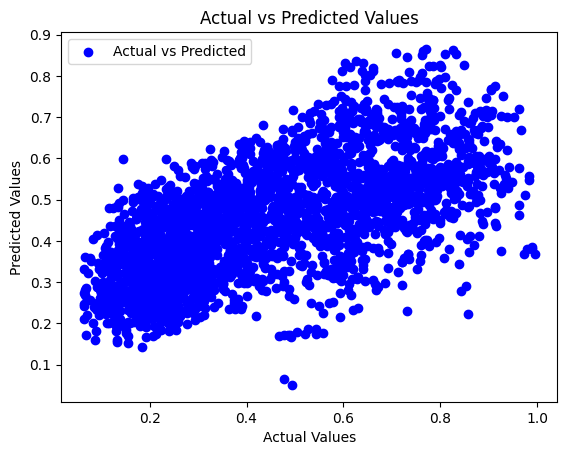

In [378]:
# Visualize the results
plt.scatter(Y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


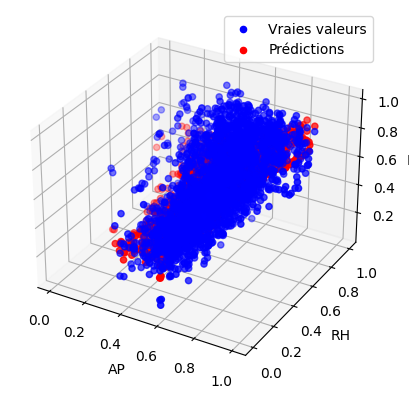

In [379]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], Y_test, c='blue', label='Vraies valeurs')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='red', label='Prédictions')

ax.set_xlabel('AP')
ax.set_ylabel('RH')
ax.set_zlabel('PE')

ax.legend()

plt.show()

In [380]:
predicted_y = pd.DataFrame({'Actual valure':Y_test,"Predicted value" : y_pred , "Difference" : Y_test - y_pred})
predicted_y


,Actual valure,Predicted value,Difference
0,0.463709,0.482164,-0.018456
1,0.212583,0.282853,-0.070271
2,0.270464,0.337247,-0.066784
3,0.187285,0.262751,-0.075467
4,0.818543,0.545496,0.273047
...,...,...,...
2866,0.433907,0.498867,-0.064960
2867,0.172318,0.224748,-0.052430
2868,0.753907,0.477067,0.276840
2869,0.817086,0.746324,0.070763


**On prendra toutes les colonnes ainsi que leur produit comme features**

In [381]:
# A Numpy matrix that has the 4 features and their product
X_all_features = np.column_stack((X[:, 0],X[:, 1], X[:, 2], X[:, 3] , X[:, 0]*X[:, 1] *X[:, 2] * X[:, 3]))

X_train, X_test, Y_train, Y_test = train_test_split(X_all_features, Y, test_size=0.3, random_state=42, shuffle = True)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (6697, 5)
Shape of X_test: (2871, 5)
Shape of Y_train: (6697,)
Shape of Y_test: (2871,)


1er Modele

In [382]:
model.fit(X_train, Y_train)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

y_pred = model.predict(X_test)


mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared score:", r2)
#la valeur de l'erreur moyenne: rmse
rmse = math.sqrt(mse)
print("Mean error:",rmse)

Model coefficients: [-0.90258454 -0.1251516   0.0614543  -0.12092647 -0.27215851]
Model intercept: 1.0400292827008233
Mean squared error: 0.0036992741737741203
R-squared score: 0.9280706328159761
Mean error: 0.06082165875552985


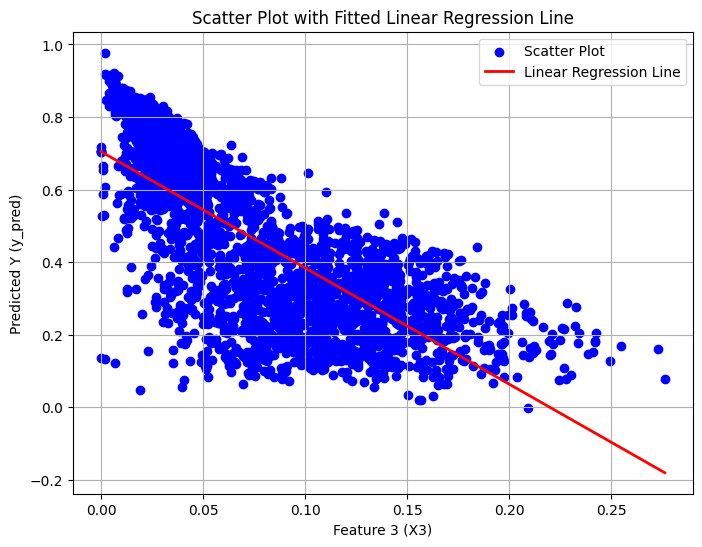

In [383]:
X3 = X_test[:, 4]

# Sort X3
sorted_indices = np.argsort(X3)
X3_sorted = X3[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Create a scatter plot with X3 and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X3, y_pred, c='blue', marker='o', label='Scatter Plot')


# Fit a simple linear regression line
coefficients = np.polyfit(X3, y_pred, 1)
regression_line = np.polyval(coefficients, X3_sorted)

# Add the regression line in red
plt.plot(X3_sorted, regression_line, color='red', linewidth=2, label='Linear Regression Line')

# Set labels and title
plt.xlabel('Feature 3 (X3)')
plt.ylabel('Predicted Y (y_pred)')
plt.title('Scatter Plot with Fitted Linear Regression Line')

# Show the legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()


2eme Modele

Mean Error (RMSE): 0.05701153872014994
R-squared score: 0.9368002668959291


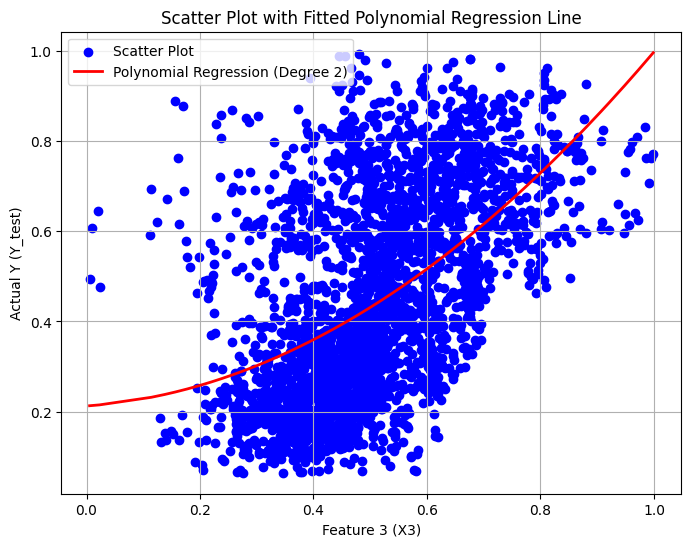

In [384]:

# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model.fit(X_train_poly, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model on the test set
mean_error = mean_squared_error(Y_test, y_pred, squared=False)
print("Mean Error (RMSE):", mean_error)

r2 = r2_score(Y_test, y_pred)
print("R-squared score:", r2)
# Sort X3 for a smoother line
sorted_indices = np.argsort(X_test[:, 2])
X3_sorted = X_test[:, 2][sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial regression line
coefficients = np.polyfit(X3_sorted, y_pred_sorted, 2)
poly_regression_line = np.polyval(coefficients, X3_sorted)

# Set up the scatter plot with X3 and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 2], Y_test, c='blue', marker='o', label='Scatter Plot')

# Add the polynomial regression line in green
plt.plot(X3_sorted, poly_regression_line, color='red', linewidth=2, label=f'Polynomial Regression (Degree {2})')

# Set labels for the axes
plt.xlabel('Feature 3 (X3)')
plt.ylabel('Actual Y (Y_test)')
plt.title('Scatter Plot with Fitted Polynomial Regression Line')

# Show the legend, grid, and plot
plt.legend()
plt.grid(True)
plt.show()

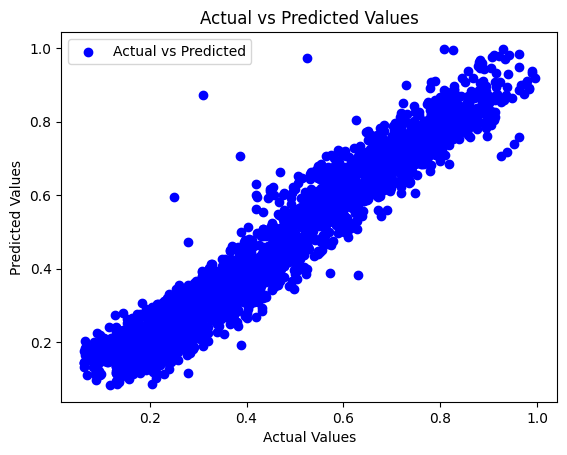

In [385]:
# Visualize the results
plt.scatter(Y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
